# Netflix Business Case

Netflix is an American subscription video on-demand over-the-top streaming service owned and operated by Netflix, Inc. The service primarily distributes films and television series produced by the media company of the same name from various genres, and it is available internationally in multiple languages.

# 1. Defining Problem Statement and Analysing basic metrics

The problem statement for our project is to analyze Netflix data and generate insights that can assist Netflix in making informed decisions about the types of shows and movies to produce and how to grow their business in different countries. This involves understanding user preferences, content performance, and regional variations to optimize their content library and expansion strategies.

In [676]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [677]:
df=pd.read_csv("NETFLIX.csv")

In [237]:
df.head()  #first five rows of data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [151]:
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [238]:
df.shape[0] #no. of rows

8807

In [112]:
df.shape[1] #no. of columns

12

In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Here we have some NaN values in our dataset, which typically indicate missing or undefined data in few rows.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [153]:
df.shape #shape of data shows 8807 rows and 12 columns

(8807, 12)

In [115]:
df.ndim #returns the number of dimensions or axes

2

In [116]:
df.info() #it shows data types, index information, column information, memory usage etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# missing value detection

In [239]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


isnull() method with True indicating missing values and False indicating non-missing values. 

In [240]:
df.isnull().any()  #if the columns have any missing  value in them

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

It displays columns such as director, cast, and country, where the columns showing as "True" indicate the presence of missing values.

In [241]:
df.isnull().sum() #To count missing values column-wise 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# imputing missing values

In [683]:
df.director.fillna("Unknown", inplace=True)
df.cast.fillna("Unknown", inplace=True)
df.country.fillna("Unavailable", inplace=True)
df.dropna(subset=["date_added","duration", "rating"], inplace=True)

The df.fillna() method is used to fill or replace missing (NaN) values in a DataFrame with specified values or strategies. It provides a way to handle missing data in a flexible manner.

In [684]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [244]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

The columns "director," "cast," and "country" have the most null values, I decided to interpret each missing value as "unavailable" in these columns. As for the remaining three columns, "date_added", "duration" and "rating," they contain a small portion of the data, so we opted to exclude them from the dataset. As a result, the data frame no longer contains any missing values.

# statistical summary

In [245]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


A statistical summary, often referred to as a "summary statistics," providing a concise overview of key statistical measures and characteristics of a dataset. 

# 3. Non-Graphical Analysis: Value counts and unique attributes 

In [247]:
df['type'].value_counts() #shows count of movies and TV shows

Movie      6126
TV Show    2664
Name: type, dtype: int64

To obtain a list of unique countries, the initial step is to un-nesting the "country" column, as it currently encompasses comma-separated values.

In [249]:
country_list = df['country'].str.split(', ', expand=True).stack()
country_list.nunique()

     

128

Now Removing "Unavailable" from the list of unique countries if it exists

In [250]:
country_list[country_list!="Unavailable"].nunique()

127

#  Pre-processing involves unnesting of the data in columns like Actor, Director, Country

**Pre-Processing data**

In [514]:
countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries_df=pd.DataFrame({"country":countries})
countries_df.reset_index(inplace=True)
countries_df
#un nested the country column which had comma-seperated values with title column


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unavailable
3,Jailbirds New Orleans,Unavailable
4,Kota Factory,India
...,...,...
10823,Zodiac,United States
10824,Zombie Dumb,Unavailable
10825,Zombieland,United States
10826,Zoom,United States


In [515]:
directors = df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
directors_df=pd.DataFrame({"director":directors})
directors_df.reset_index(inplace=True)
directors_df
#un nested the director column which had comma-seperated values

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown
...,...,...
9590,Zodiac,David Fincher
9591,Zombie Dumb,Unknown
9592,Zombieland,Ruben Fleischer
9593,Zoom,Peter Hewitt


In [516]:
Cast = df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
Cast_df=pd.DataFrame({"cast":Cast})
Cast_df.reset_index(inplace=True)
Cast_df
#un nested the cast column which had comma-seperated values

,title,cast
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64836,Zubaan,Manish Chaudhary
64837,Zubaan,Meghna Malik
64838,Zubaan,Malkeet Rauni
64839,Zubaan,Anita Shabdish


In [517]:
Listed_in= df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
listed_df=pd.DataFrame({"listed_in":Listed_in})
listed_df.reset_index(inplace=True)
listed_df
#un nested the listed_in column which had comma-seperated values

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19289,Zoom,Children & Family Movies
19290,Zoom,Comedies
19291,Zubaan,Dramas
19292,Zubaan,International Movies


In [518]:
merged_df = countries_df.merge(Cast_df, on='title', how='outer')  # Merge country_df and Cast_df
merged_df = merged_df.merge(directors_df, on='title', how='outer')  # Merge with directors_df
merged_df = merged_df.merge(listed_df, on='title', how='outer')  # Merge with listed_df
merged_df

,title,country,cast,director,listed_in
0,Dick Johnson Is Dead,United States,Unknown,Kirsten Johnson,Documentaries
1,Blood & Water,South Africa,Ama Qamata,Unknown,International TV Shows
2,Blood & Water,South Africa,Ama Qamata,Unknown,TV Dramas
3,Blood & Water,South Africa,Ama Qamata,Unknown,TV Mysteries
4,Blood & Water,South Africa,Khosi Ngema,Unknown,International TV Shows
...,...,...,...,...,...
201758,Zubaan,India,Anita Shabdish,Mozez Singh,International Movies
201759,Zubaan,India,Anita Shabdish,Mozez Singh,Music & Musicals
201760,Zubaan,India,Chittaranjan Tripathy,Mozez Singh,Dramas
201761,Zubaan,India,Chittaranjan Tripathy,Mozez Singh,International Movies


In [318]:
other_columns = df.drop(columns=['director', 'cast', 'country', 'listed_in'])
#droping the columns from main data frame which already merged

In [319]:
final_df=pd.merge(other_columns, merged_df, on='title', how='left') 

In [498]:
final_df['date_added'] = pd.to_datetime(final_df['date_added'])#changing the data type of date_added column to access the date
final_df['year_added'] = final_df.date_added.dt.year   #adding few columns
final_df['month_added'] = final_df.date_added.dt.month_name()
final_df['day_added'] = final_df.date_added.dt.day_name()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201763 entries, 0 to 201762
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201763 non-null  object        
 1   type          201763 non-null  object        
 2   title         201763 non-null  object        
 3   director      201763 non-null  object        
 4   cast          201763 non-null  object        
 5   country       201763 non-null  object        
 6   date_added    201763 non-null  datetime64[ns]
 7   release_year  201763 non-null  int64         
 8   rating        201763 non-null  object        
 9   duration      201763 non-null  object        
 10  listed_in     201763 non-null  object        
 11  description   201763 non-null  object        
 12  year_added    201763 non-null  int64         
 13  month_added   201763 non-null  object        
 14  day_added     201763 non-null  object        
dtypes: datetime64[ns]

In [605]:
#final sorted data frame
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday


In [584]:
x = df.groupby(['rating']).size().reset_index(name='counts') #shows unique rating counts
x

,rating,counts
0,G,41
1,NC-17,3
2,NR,79
3,PG,287
4,PG-13,490
5,R,799
6,TV-14,2157
7,TV-G,220
8,TV-MA,3205
9,TV-PG,861


In [1064]:
#grouped by rating and type
show_rating= final_df.groupby(['rating','type'])[ 'title'].nunique().reset_index(name='ratings_count')
show_rating=show_rating.set_index('rating')
show_rating

,type,ratings_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,4
PG,Movie,287
PG-13,Movie,490
R,Movie,797
R,TV Show,2
TV-14,Movie,1427


In [921]:
#grouped by month_added and type
release_month= final_df.groupby(['month_added','type'])[ 'title'].nunique().reset_index(name='release_count')
release_month

#shows monthwise count of Movies & TV Shows

,month_added,type,release_count
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


In [587]:
#grouped by year_added and type
release_year= final_df.groupby(['year_added','type'])[ 'title'].nunique().reset_index(name='release_count')
release_year

#shows yearwise count of Movies & TV Shows

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [588]:
#grouped by day_added and type
release_Day= final_df.groupby(['day_added','type'])[ 'title'].nunique().reset_index(name='release_Day')
release_Day

#shows Daywise count of Movies & TV Shows

,day_added,type,release_Day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

# Percentage of Titles

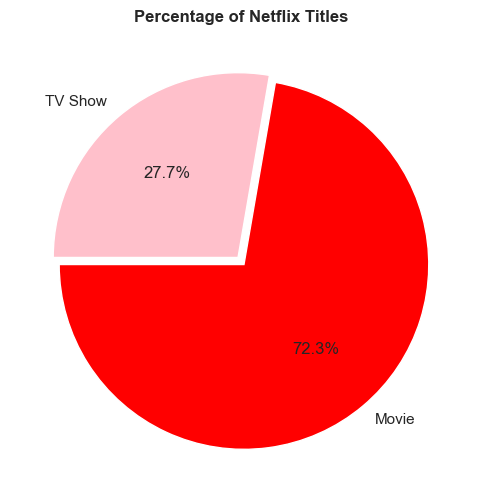

In [918]:
#Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

plt.title("Percentage of Netflix Titles", fontweight="bold")
g=plt.pie(final_df.type.value_counts(),explode=(0.025,0.025),
labels=final_df.type.value_counts().index, colors=['red','pink'],autopct='%1.1f%%',startangle=180)

# Dist plot of  release year

C:\Users\DELL\AppData\Local\Temp\ipykernel_14044\2152552212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['release_year'])


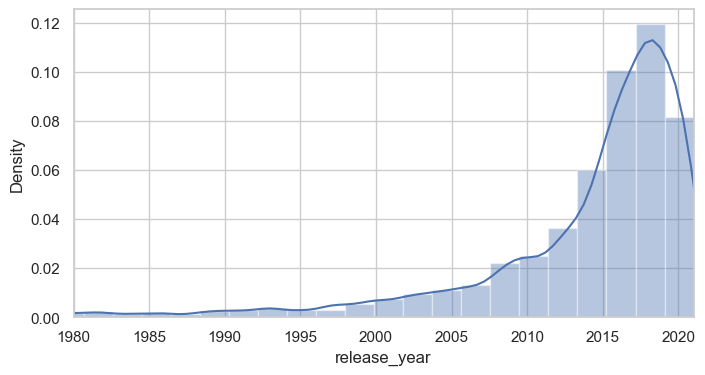

In [825]:
plt.figure(figsize=(8,4))
sns.distplot(final_df['release_year']) 
plt.xlim(1980,2021)
plt.show()

# Year wise distributions

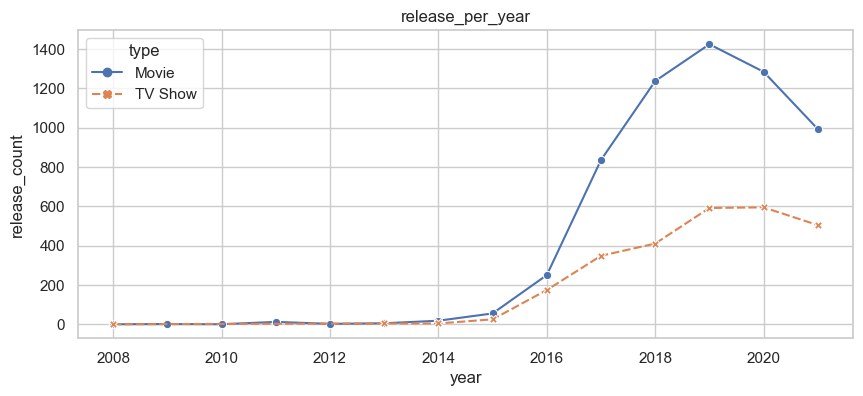

In [603]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')
plt.show()

# Month wise distributions

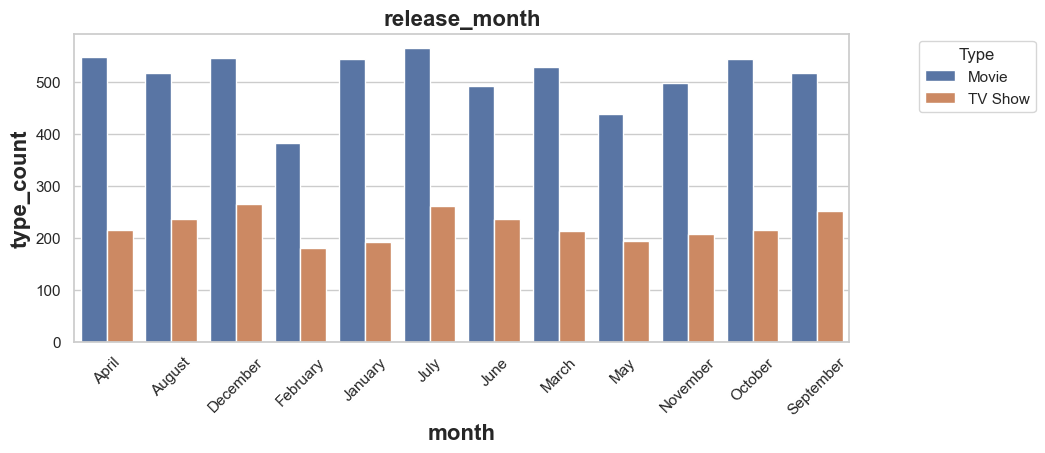

In [666]:
plt.figure(figsize=(10, 4))
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.legend(title='Type', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('release_month' , fontsize=16, fontweight='bold')
plt.xlabel('month', fontsize=16, fontweight='bold')
plt.ylabel('type_count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


# Top Directors on Netflix

In [385]:
director_counts = final_df.groupby('director')['title'].nunique().reset_index()
director_counts.columns = ['Director', 'Number of Titles']
director_counts = director_counts[director_counts.Director!="Unknown"]
director_counts = director_counts.sort_values(by='Number of Titles', ascending=False)
top_directors = director_counts.head(10)
top_directors

,Director,Number of Titles
3747,Rajiv Chilaka,22
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
1953,Jay Karas,15
754,Cathy Garcia-Molina,13
1950,Jay Chapman,12
2943,Martin Scorsese,12
4940,Youssef Chahine,12


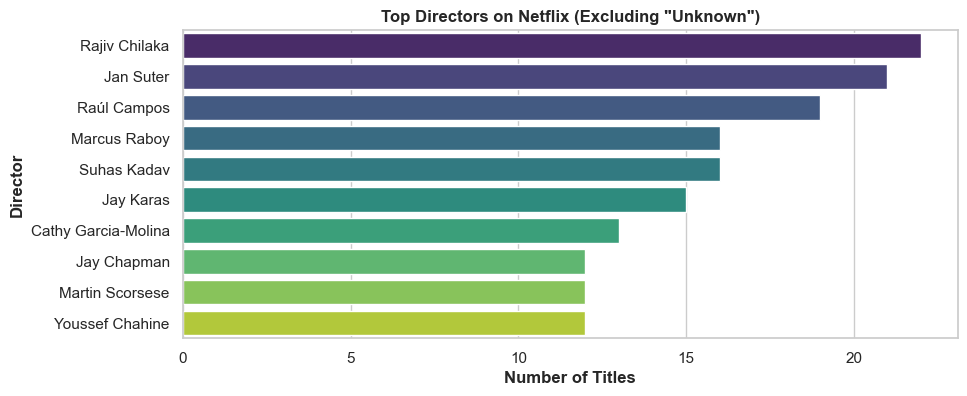

In [406]:
plt.figure(figsize=(10, 4))
sns.barplot(data=top_directors, x='Number of Titles', y='Director', palette='viridis')
plt.xlabel('Number of Titles', fontweight="bold")
plt.ylabel('Director', fontweight="bold")
plt.title('Top Directors on Netflix (Excluding "Unknown")', fontweight="bold")
plt.show()

# Top Genres on Netflix

In [326]:
genre_counts = final_df.groupby('listed_in')['title'].nunique().reset_index()
genre_counts.columns = ['Genres', 'Number of Titles']
genre_counts = genre_counts.sort_values(by='Number of Titles', ascending=False)
top_genres = genre_counts.head(10)
top_genres

,Genres,Number of Titles
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,762
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


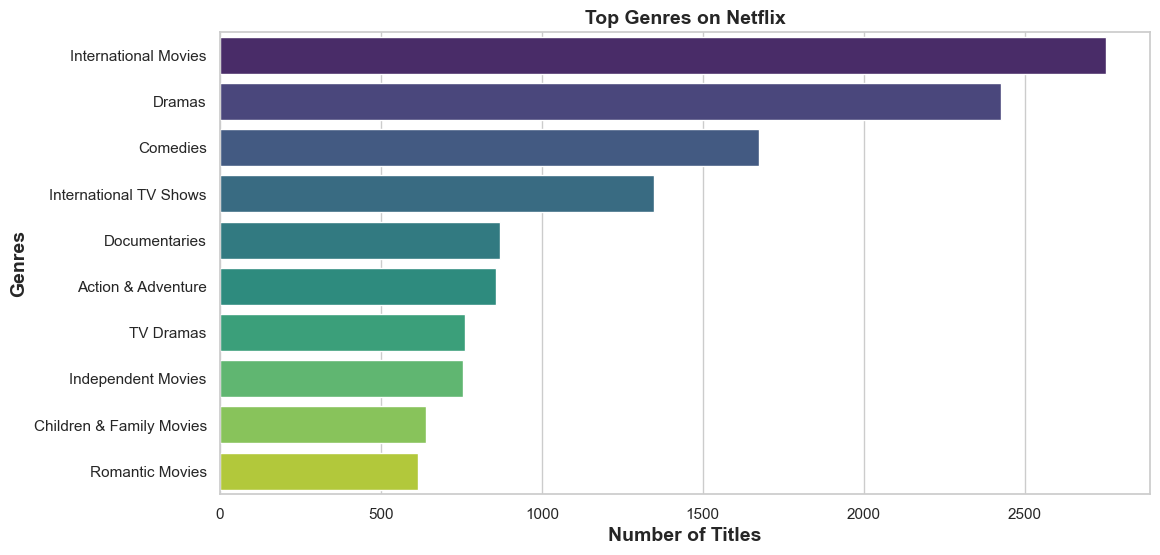

In [665]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=top_genres, x='Number of Titles', y='Genres', palette='viridis')
plt.xlabel('Number of Titles', fontsize=14, fontweight="bold")
plt.ylabel('Genres', fontsize=14, fontweight="bold")
plt.title('Top Genres on Netflix', fontsize=14, fontweight="bold")
plt.show()

From the graph, we know that International Movies take the first place, followed by dramas and comedies

# Analyzing the top Actors on Netflix

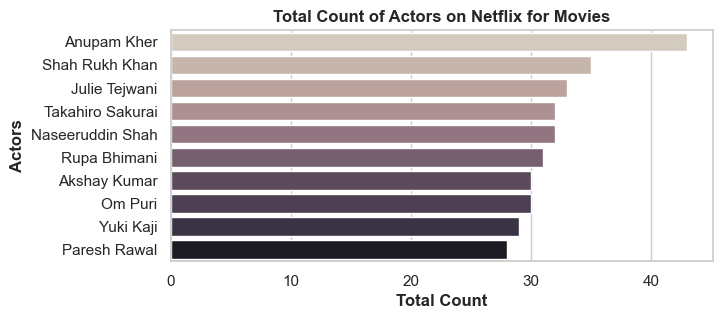

In [982]:
actor = final_df[final_df['type'] == 'Movie']
actors = actor.groupby(['cast'])['title'].nunique().reset_index()
actors.columns = ['Actor', 'Total Count']
actors=actors[actors.Actor!="Unknown"]
top10_actors = actors.sort_values(by=['Total Count'], ascending=False).head(10)

plt.figure(figsize=(7, 3))
sns.barplot(data=top5_actors, x='Total Count', y='Actor', palette='magma_r', saturation=.2)
plt.xlabel('Total Count', fontweight="bold")
plt.ylabel('Actors',fontweight="bold")
plt.title('Total Count of Actors on Netflix for Movies', fontweight="bold")
plt.show()

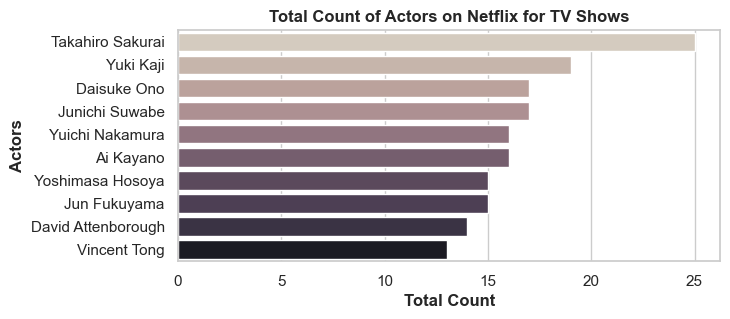

In [983]:
actor_TV = final_df[final_df['type'] == 'TV Show']
TVshows_Actor = actor_TV.groupby(['cast'])['title'].nunique().reset_index()
TVshows_Actor.columns = ['Actor', 'Total Count']
TVshows_Actor=TVshows_Actor[TVshows_Actor.Actor!="Unknown"]
top10_actors_TVshows = TVshows_Actor.sort_values(by=['Total Count'], ascending=False).head(10)

plt.figure(figsize=(7, 3))
sns.barplot(data=top10_actors_TVshows, x='Total Count', y='Actor', palette='magma_r', saturation=.2)
plt.xlabel('Total Count', fontweight="bold")
plt.ylabel('Actors',fontweight="bold")
plt.title('Total Count of Actors on Netflix for TV Shows', fontweight="bold")
plt.show()


# Comparison of tv shows vs. movies.

In [927]:
movies_df = final_df[final_df['type'] == 'Movie']
movie_counts = movies_df.groupby('country')['show_id'].nunique().reset_index()
movie_counts = movie_counts[movie_counts.country!="Unavailable"]
top_10_movie_countries = movie_counts.sort_values(by='show_id', ascending=False).head(10)
top_10_movie_countries.rename(columns={'show_id':'Movies_count'}, inplace=True)
top_10_movie_countries

,country,Movies_count
115,United States,2748
43,India,962
113,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


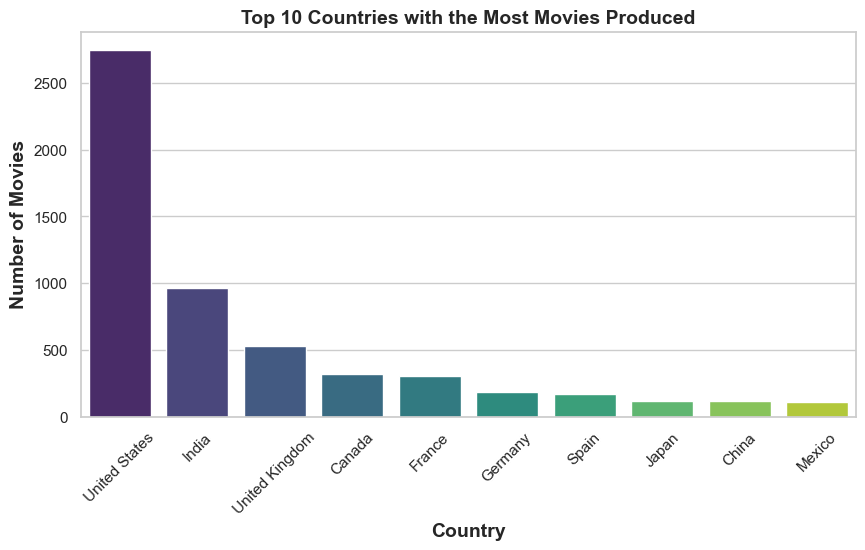

In [929]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_movie_countries, x='country', y='Movies_count', palette='viridis')
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')
plt.title('Top 10 Countries with the Most Movies Produced', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [930]:
tvShows_df = final_df[final_df['type'] == 'TV Show']
tvShows_counts = tvShows_df.groupby('country')['show_id'].nunique().reset_index()
tvShows_counts = tvShows_counts[tvShows_counts.country!="Unavailable"]
top_10_tvShows_count = tvShows_counts.sort_values(by='show_id', ascending=False).head(10)
top_10_tvShows_count.rename(columns={'show_id':'TVshows_count'}, inplace=True)
top_10_tvShows_count

,country,TVshows_count
64,United States,932
63,United Kingdom,271
30,Japan,197
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,64
53,Spain,61


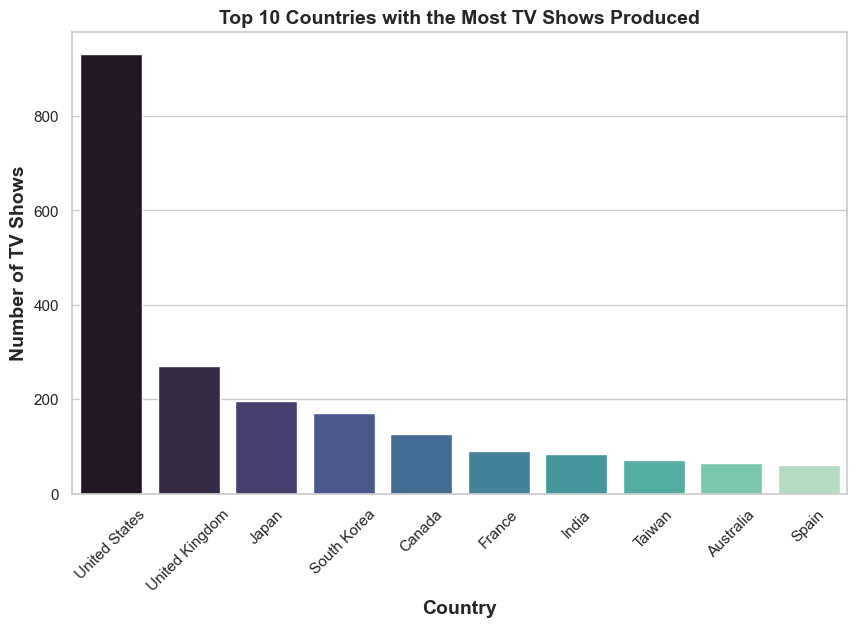

In [931]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_tvShows_count, x='country', y='TVshows_count', palette='mako')
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of TV Shows',fontsize=14, fontweight='bold')
plt.title('Top 10 Countries with the Most TV Shows Produced', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

# 5 durations with the largest number of titles 

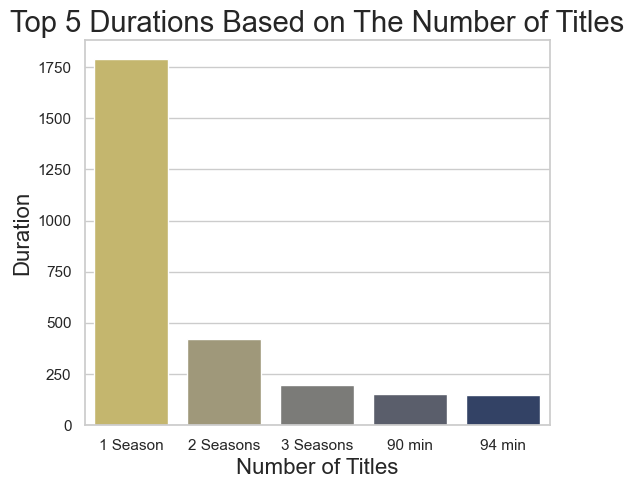

In [657]:
netflix_duration = final_df.groupby('duration')["title"].nunique().reset_index()
netflix_duration.columns = ['duration', 'title_count']

top_5_durations = netflix_duration.sort_values(by='title_count', ascending=False).head(5)

plt.figure(figsize=(6, 5))
sns.barplot(y='title_count', x='duration', data=top_5_durations, palette='cividis_r')
plt.title('Top 5 Durations Based on The Number of Titles', fontsize=21)
plt.xlabel('Number of Titles', fontsize=16)
plt.ylabel('Duration', fontsize=16)
plt.show()

# Most Popular Words in description


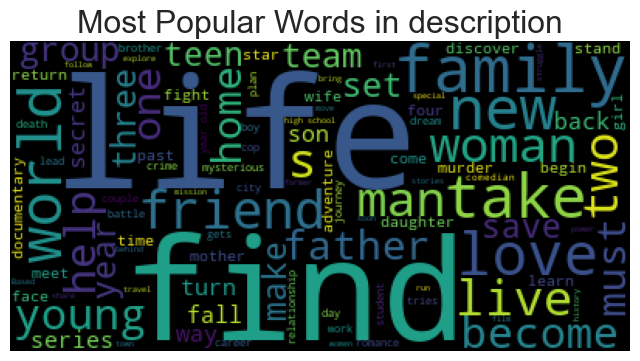

In [1005]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(8,10))

wordcloud = WordCloud(stopwords=STOPWORDS, max_words=100).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in description',fontsize = 23)
plt.show()

# 4.2 For categorical variable(s): Boxplot
       Duration Distribution for Movies and TV Shows

C:\Users\DELL\AppData\Local\Temp\ipykernel_14044\3782318722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.split(" ").str[0].astype(int)


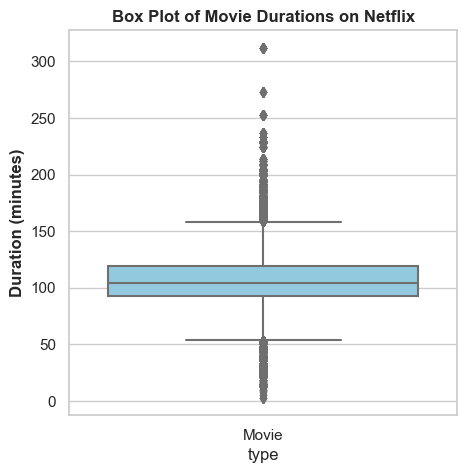

In [1066]:
movies_df = final_df[final_df['type'].str.contains('Movie')]
movies_df['duration'] = movies_df['duration'].str.split(" ").str[0].astype(int)


plt.figure(figsize=(5, 5))
sns.boxplot(data=movies_df, x='type', y='duration', color='skyblue')
plt.title('Box Plot of Movie Durations on Netflix', fontweight='bold')
plt.ylabel('Duration (minutes)', fontweight='bold')
plt.show()

When examining the box plot for movies, it becomes apparent that the majority of films have durations that fall within a typical range, and there are only a few outliers with durations of approximately 2.5 hours or more. This indicates that Netflix primarily offers movies designed to adhere to standard viewing times.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14044\2588828164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvShows_df['duration'] = tvShows_df['duration'].str.split(" ").str[0].astype(int)


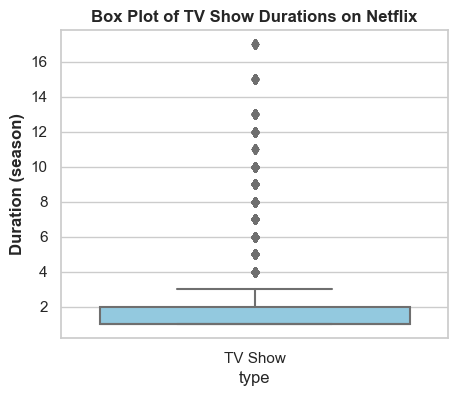

In [1067]:
tvShows_df = final_df[final_df['type'].str.contains('TV Show')]
tvShows_df['duration'] = tvShows_df['duration'].str.split(" ").str[0].astype(int)


plt.figure(figsize=(5, 4))
sns.boxplot(data=tvShows_df, x='type', y='duration', color='skyblue')
plt.title('Box Plot of TV Show Durations on Netflix', fontweight='bold')
plt.ylabel('Duration (season)', fontweight='bold')
plt.show()

Analyzing the box plot for TV shows, it becomes evident that the majority of shows typically have one to four seasons, and there are only a few outliers with longer durations. This observation is consistent with the previous trends, reinforcing the idea that Netflix primarily emphasizes shorter series formats.

# type of ratings was released in what year.

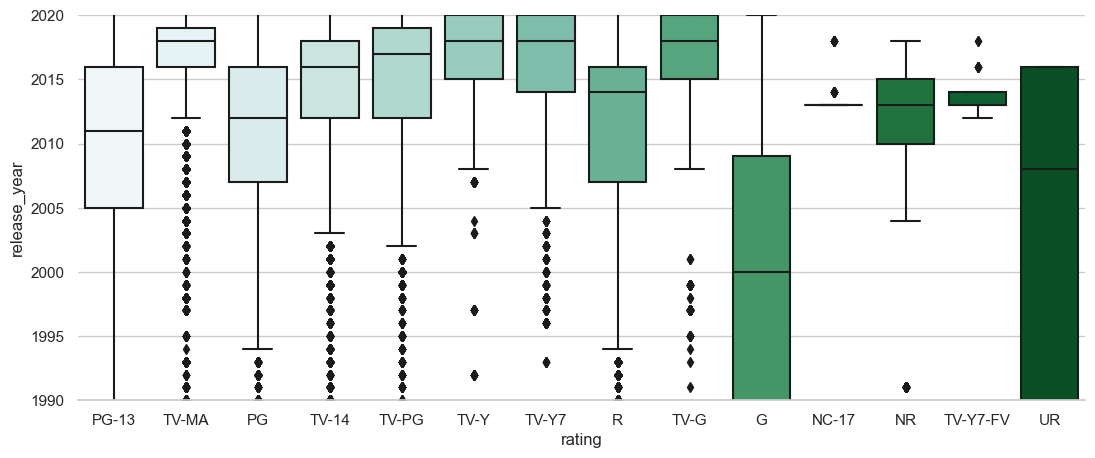

In [1068]:
plt.figure(figsize=(13,5))
sns.boxplot(y='release_year', x='rating', data=final_df, palette='BuGn')
sns.despine(left=True)
plt.ylim(1990,2020)
plt.show()

# Movies and TV Shows by Release Year

(2000.0, 2020.0)

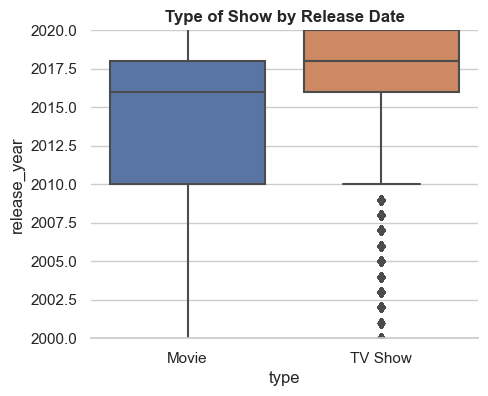

In [1070]:
plt.figure(figsize=(5,4))
sns.boxplot(x='type', y='release_year', data=final_df)
sns.despine(left=True)
plt.title('Type of Show by Release Date', fontweight='bold')
plt.ylim(2000,2020)

It sees tv shows have a more recent release_year. This means tv shows are releasing more in recent years.

# 4.3 For correlation: Heatmaps, Pairplots

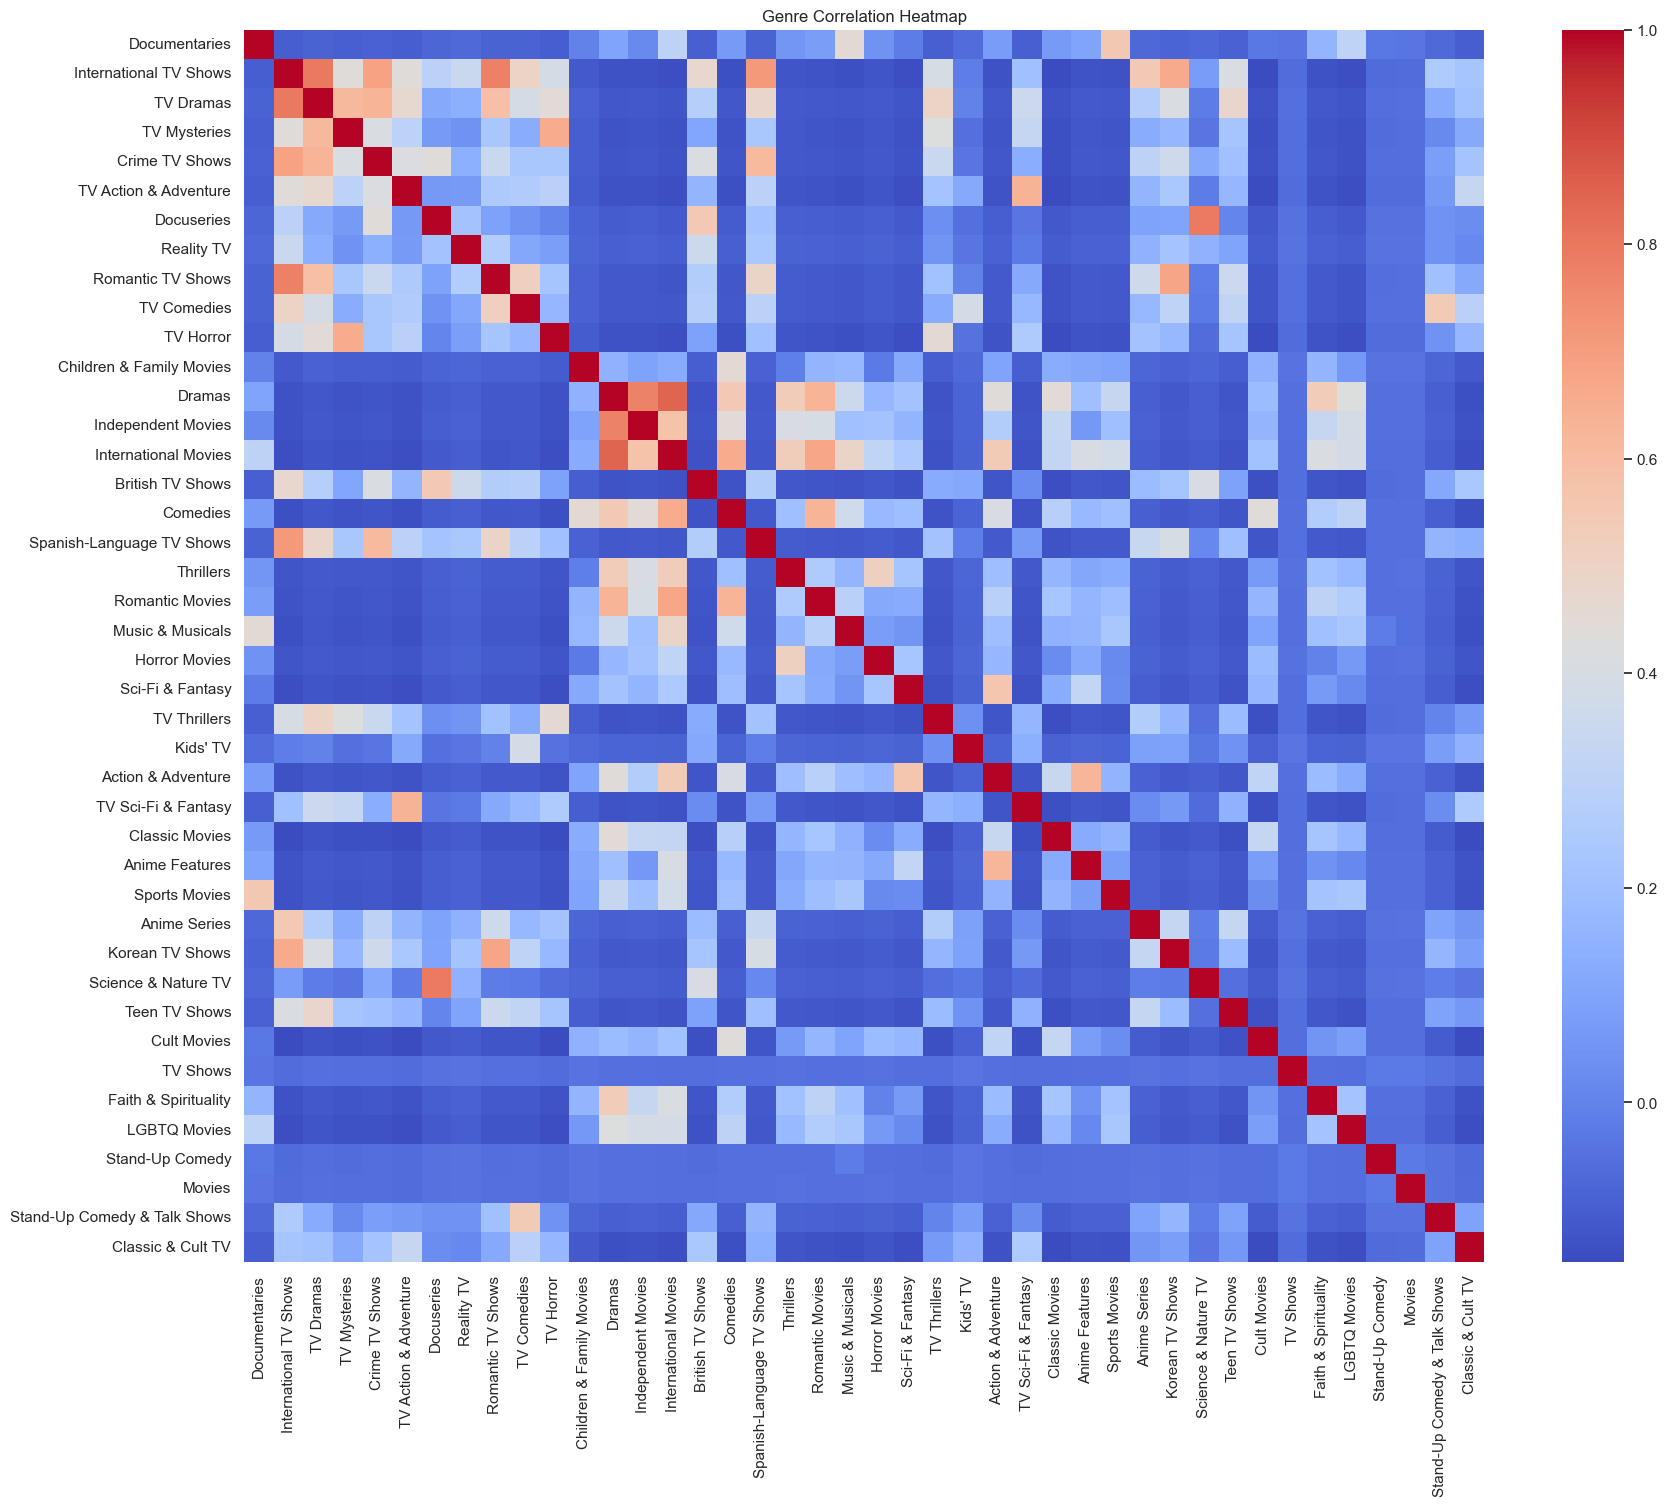

In [717]:
df1=pd.read_csv("NETFLIX.csv")

# Extracting unique genres from the 'listed_in' column
genres = df1['listed_in'].str.split(', ', expand=True).stack().unique()
genre_data = pd.DataFrame(index=genres, columns=genres, dtype=float)

# Fill the genre data DataFrame with zeros
genre_data.fillna(0, inplace=True)

# Iterate over each row in the original DataFrame and update the genre data DataFrame
for _, row in df1.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            genre_data.at[genre1, genre2] += 1

# Create a correlation matrix using the genre data
correlation_matrix = genre_data.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

The heatmap demonstrates the correlation between different genres. By analyzing the heatmap, we can identify strong positive correlations between specific genres, such as TV Dramas and International TV Shows, Romantic TV Shows, and International TV Shows.

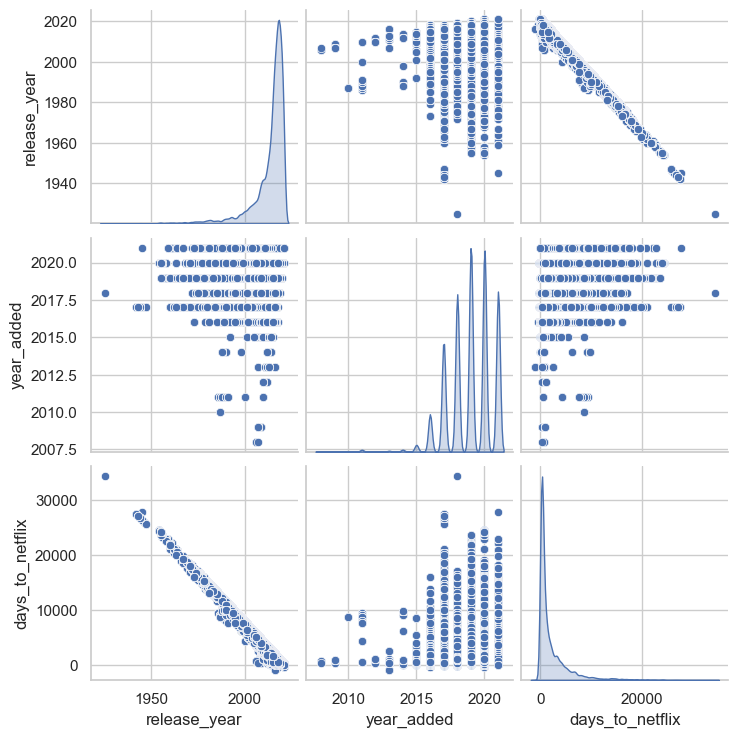

In [1062]:
p = sns.pairplot(final_df, kind='scatter', diag_kind='kde')
plt.show()

# 5. Missing Value & Outlier check (Treatment optional) 

**What are Missing values?**
In a dataset, we often see the presence of empty cells, rows, and columns, also referred to as Missing values. They make the dataset inconsistent and unable to work on. Many machine learning algorithms return an error if parsed with a dataset containing null values. Detecting and treating missing values is essential while analyzing and formulating data for any purpose.

**Detecting missing values**
There are several ways to detect missing values in Python. isnull() function is widely used for the same purpose.

dataframe.isnull().values.any() allows us to find whether we have any null values in the dataframe.

dataframe.isnull().sum() this function displays the total number of null values in each column.

In [724]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Deleting missing values**
This is not a good practice as it can lose valuable insights from the data. A good chunk of data can be lost if one drops the rows containing null values.

**Imputation methods**
Replacing or predicting the data in the stead of the missing values or outliers present is referred to as imputing the data. Various imputation methods are followed to treat the outliers and missing values. Some of these are:
-Filling in zero
-Filling in with a number
-Filling with mean, median value

**Missing values through heat map**

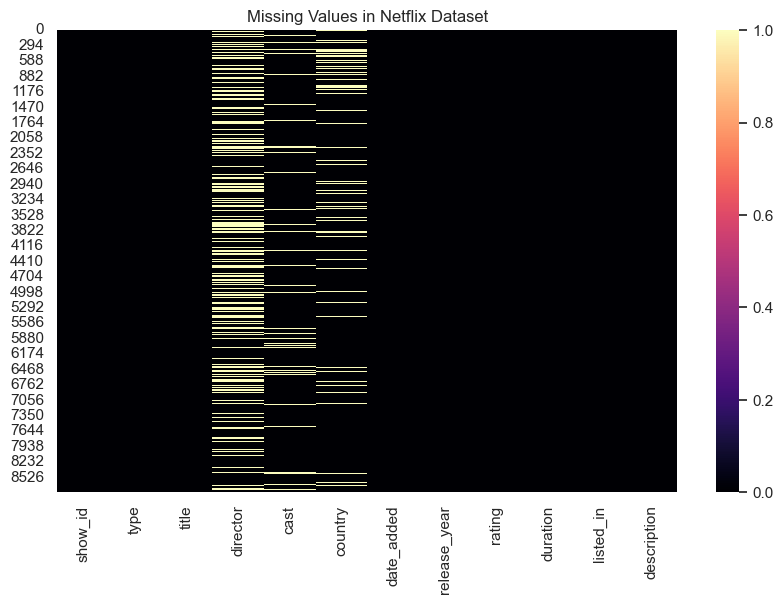

In [713]:
# Check for missing values
missing_values = df1.isna().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=True, cmap='magma')
plt.title('Missing Values in Netflix Dataset')
plt.show()

 **missing values through bar chart**

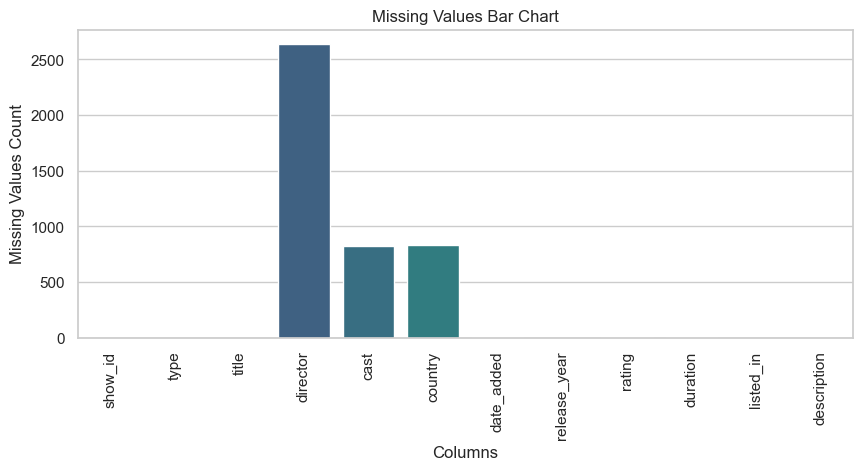

In [690]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df1.columns, y=df1.isnull().sum(), palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Bar Chart')
plt.show()

**What is an outlier?**
an outlier is defined as an observation that deviates abnormally from the standard data. In simple words, an outlier is used to define those data values which are far away from the general values in a dataset. An outlier can be broken down into out-of-line data.
For example, let us consider a row of data [10,15,22,330,30,45,60]. In this dataset, we can easily conclude that 330 is way off from the rest of the values in the dataset, thus 330 is an outlier.

**Why do we need to treat outliers?**
Outliers can lead to vague or misleading predictions while using machine learning models. Specific models like linear regression, logistic regression, and support vector machines are susceptible to outliers. Outliers decrease the mathematical power of these models, and thus the output of the models becomes unreliable. However, outliers are highly subjective to the dataset. Some outliers may portray extreme changes in the data as well.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14044\2887444655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)


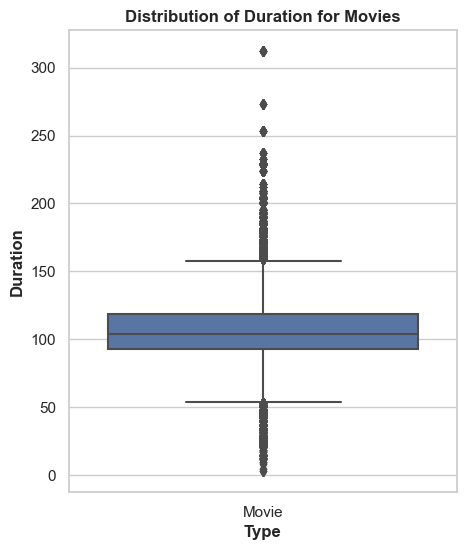

In [721]:
df_movies =  final_df[final_df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for movie duration
plt.figure(figsize=(5, 6))
sns.boxplot(data=df_movies, x='type', y='duration')
plt.xlabel('Type', fontweight='bold')
plt.ylabel('Duration',fontweight='bold')
plt.title('Distribution of Duration for Movies', fontweight='bold')
plt.show()

 The top and bottom whiskers can be understood as the boundaries of data, and any data lying outside will be an outlier.

# 6. Insights based on Non-Graphical and Visual Analysis

**6.1 Comments on the range of attributes**

In [754]:
final_df.listed_in.nunique()  

42

*there are total 42 genres include, Drama, independent movies, Comedies and Romantic movies*

**Continuous attributes**

In [802]:
#release_year
final_df.release_year.min()

1925

In [803]:
final_df.release_year.max()

2021

it shows range of release year from 1925 to 2021

In [808]:
#year_added  on netflix
final_df.year_added.min()

2008

In [809]:
final_df.year_added.max()

2021

shows range of release year from 2008 to 2021, it appears that numerous movies have been added to Netflix several years after their release date.  Some movies got added on netflix after 75 years of actual release date.

**No. of days the movie will be added to Netflix after the release of
the movie**

In [822]:
unique_titles_and_days = final_df[['title', 'days_to_netflix']].drop_duplicates()
unique_titles_and_days


,title,days_to_netflix
0,Dick Johnson Is Dead,633
1,Blood & Water,266
58,Ganglands,266
85,Jailbirds New Orleans,266
87,Kota Factory,266
...,...,...
201674,Zodiac,4706
201704,Zombie Dumb,546
201707,Zombieland,3956
201721,Zoom,5123


**Categorical attributes**

In [838]:
countsM=final_df.groupby('type')['title'].nunique().reset_index(name='counts')
countsM

,type,counts
0,Movie,6126
1,TV Show,2664


It seems that Netflix offers a significantly larger number of movies compared to TV shows.
netflix represents  73% of movies content and 27% of TV Shows

# 6.2 Comments on the distribution of the variables and relationship between them

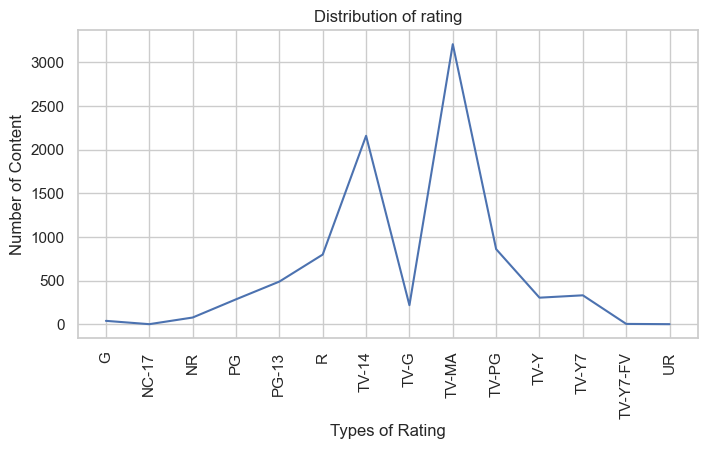

In [915]:
y = final_df.groupby(['rating'])['title'].nunique().reset_index(name='counts')
y.sort_values(by='counts', ascending=False)

plt.figure(figsize=(8, 4))
sns.lineplot(data=y, x='rating', y='counts')
plt.xlabel('Types of Rating')
plt.ylabel('Number of Content')
plt.title('Distribution of rating')
plt.xticks(rotation=90)

plt.show()

It seems most of the content belongs to 
**TV-MA** Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

**TV-14** content unsuitable for children under 14 years of age.
and least belongs to **G** (suitable to be seen by children), **UR**(unrated)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14044\350169970.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=content_counts.head(30), x='release_year', y='Content_count', palette='viridis')


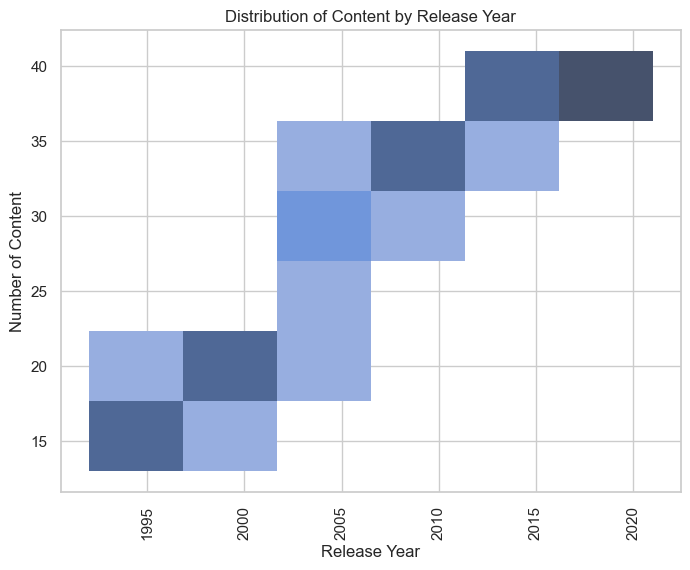

In [872]:
yearly_content = final_df.groupby('release_year')
content_counts = yearly_content['listed_in'].nunique().reset_index(name='Content_count')
content_counts=content_counts.sort_index(ascending=False)


plt.figure(figsize=(8, 6))
sns.histplot(data=content_counts.head(30), x='release_year', y='Content_count', palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Number of Content')
plt.title('Distribution of Content by Release Year')
plt.xticks(rotation=90)

plt.show()

 In our plot, the darker bars indicate release years with a higher number of content, while lighter bars represent years with fewer content. Darker colors represent higher density or frequency of genre in those specific release years.

# 6.3 Comments for each univariate and bivariate plot

# **Univariate plot**

**Pie Chart**-"*Percentage of titles*"

The pie chart illustrates the distribution of content on Netflix, with movies accounting for 72.3% of the total content, while TV shows make up the remaining portion.

**Dist plot of release year** 

The plot shows how Netflix content was added and it is worth noting that in the last decade, movie content added is quite higher than TV shows in this period. In 2019, movie addition peaked at movies, while TV shows saw their highest content addition around 2020. A significant decline in content addition is noticed in 2020 which was majorly caused by the impact of the COVID-19 pandemic. Government-enforced lockdown directly affected global movie productions, hence content releases and additions stalled.


# Bivariate plot

 **1. Month wise Distribution**
 
The chart shows that most content is preferably added in December and closely followed by January, while the least content is added in February. Netflix focuses on content additions during festive periods when lots of people would get to be with their families and friends.

**2. Year wise distribution**

Netflix show a lower number of movie releases between 2008 and 2015. However, starting from 2016, there was a significant increase in the number of movies and TV shows added to the platform. The visualizations indicate that 2019 witnessed the highest number of releases. Subsequently, there was a decline in the release rate in 2020 and 2021.

**3. Comparison of Movies & TV Shows with country**

The visualization indicates that the top countries for movie content production are the United States (2,748 titles), India (962 titles), and the United Kingdom (532 titles). Similarly, for TV shows, the leading countries in content production are the United States (932 titles), the United Kingdom (271 titles), and Japan (197 titles).

The United States prefers movies but still consumes a considerable amount of TV shows compared to other countries, and India also prefers movie content over TV shows. Interestingly, the Asian duo of Japan and South Korea prefer TV series over movie content.


**4. Top Genre of Netflix**

Netflix offers a range of genre to its subscribers and most of its content fall into multiple genres, however the visual above puts into consideration single-genre content. The most popular genres are International Movies(2752), Dramas (2426), followed by comedies (1674) and Action & Adventure (859) respectively.

**4. Top Directors of Netflix**

Directors whose work features the most on Netflix are Rajiv Chilaka (known for animated series) with 22 contents, Raul Campos (known for his comedy genre) with 19, Jan Suter (a director based in Mexico) with 21 contents, Marcus Raboy (American film & Music director) with 16 and Jay Karas (America film director) with 15 total contents.

**5. Top Actors of Netflix**

The actors with the most cast appearances are Anupam Kher (43), Shah Rukh Khan (35), and Julie Tejwani as Voice Actress (33) with all three being Bollywood Actors.

# 7. Business Insights

**1. Top Content Producers:** The United States is the top content producer for both movies and TV shows on Netflix. This could be due to the country's robust entertainment industry.

**2. Content Addition:** July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release.

**3. Global Reach:** The presence of content from various countries indicates Netflix's efforts to cater to a global audience. Understanding the preferences of viewers in different regions can help tailor content offerings.

**4. Popularity** International Movies is a genre that is mostly in Netflix,

-The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai,

-The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher,

-The largest count of Netflix content is made with a “TV-14” rating, The dataset is mostly aligned for mature audiences and mostly have parental guideline attached with the or any rating that is not kids friendly.

**5.Content Duration:** Most of the tv shows present in the dataset could not last more than 2-4 seasons.
Shows having less runtime have higher score as compared to longer shows. This is explanable that most people would prefer watching a 30 min comedy show as compared to 2 hours documentary show. Movies having less or moderate runtime is also preferred by the audience.
Most of the movies or shows present in the dataset are of recent times. Hence strata of old tv shows and movies are present in less quantity.

**6. Content Partnerships:** Patterns in content acquisition from specific studios, directors, or actors can provide insights into Netflix's partnerships and collaborations, which can inform future business strategies.

**7. Content Themes:** The prevalence of words like "world," "life," and "family" suggests that netflix content may revolve around themes related to everyday life, family dynamics, or personal experiences.
 Words like "live" and "become" generally convey positivity and growth. This could indicate that your content emphasizes personal development, self-improvement, or inspirational topics.
 The presence of such words might suggest that your target audience is interested in content that resonates with their personal lives and aspirations. Understanding our audience's interests is crucial for content creators.
 
 **8.Content Ratings:** Understanding the distribution of content ratings helps identify trends in the types of content that resonate with viewers based on age groups and preferences.

 




# 8. Recommendations

1. Increase the diversity of content to cater to a wider audience. Include more genres, languages, and cultures to make your platform more inclusive.
2. Invest in creating content that resonates with specific regions. Tailor your offerings to local tastes and preferences to attract more subscribers globally.
3. Continuously enhance the user interface for a seamless and enjoyable viewing experience. Make navigation easy, and improve content discovery algorithms.
4. Further refine your recommendation system to provide users with content that aligns with their viewing history and preferences.
5. Continue investing in high-quality original content. Exclusive shows and movies can set you apart from competitors and retain subscribers.
6. Implement reminders for users when content is set to expire soon. This can encourage more timely viewing and engagement.
7. Consider flexible pricing models, such as lower-cost plans with ads or family bundles, to attract a broader subscriber base.
8. Promote the offline viewing feature more actively. Many users appreciate the ability to download content for on-the-go viewing.
9. Strengthen data security and privacy measures to build trust with subscribers. Clearly communicate how user data is used and protected.
10. Create a user-friendly feedback system for users to report issues, suggest improvements, or request specific content.